In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df=pd.read_csv('/content/green_tech_data.csv')

print(df.head())

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [ ]:
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [ ]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [ ]:
print(df.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [ ]:
def is_balanced(df, column_name):
    value_counts = df[column_name].value_counts()
    # Define a threshold for imbalance (e.g., 10% difference)
    threshold = 0.1
    max_count = value_counts.max()
    min_count = value_counts.min()
    if max_count / (min_count + 1e-8) < (1 + threshold) : # Add a small value to avoid division by zero
        return True  # Values are balanced
    else:
        return False  # Values are imbalanced

# Example usage for 'sustainability' column
is_sustainability_balanced = is_balanced(df, 'sustainability')

if is_sustainability_balanced:
    print("The 'sustainability' column is balanced.")
else:
    print("The 'sustainability' column is imbalanced.")

The 'sustainability' column is imbalanced.


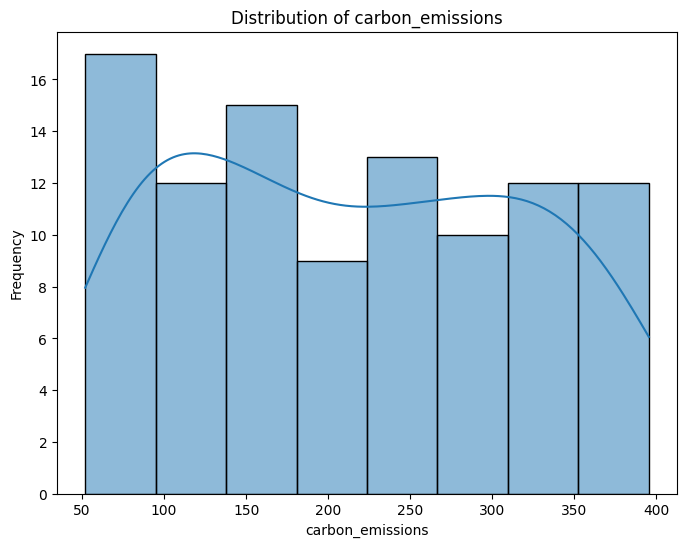

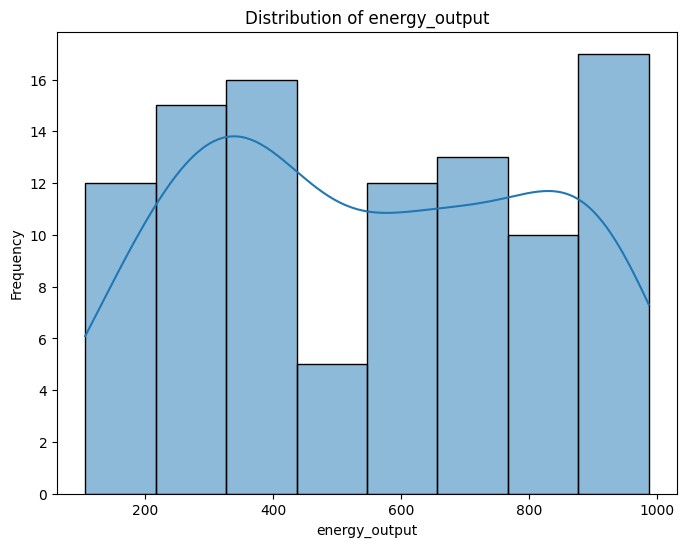

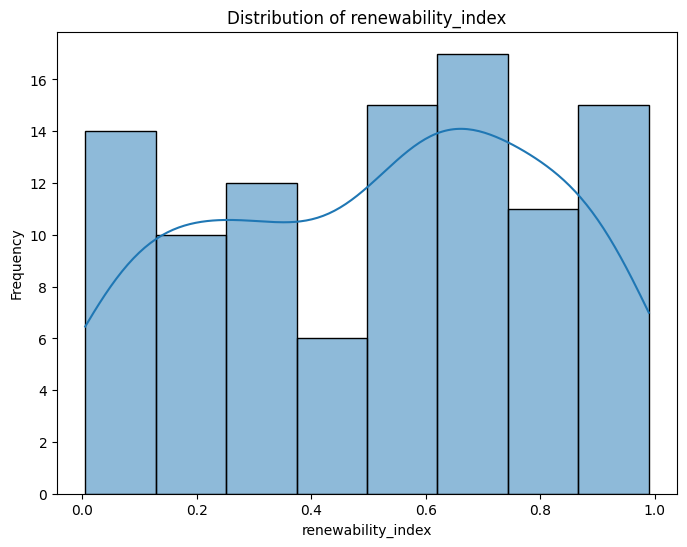

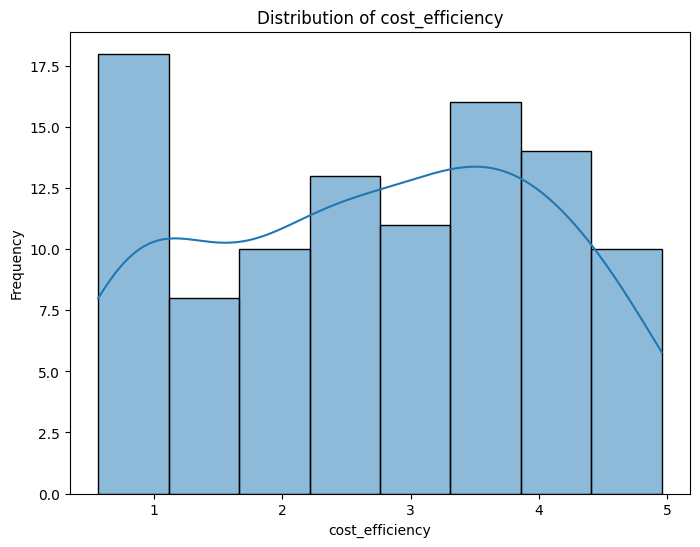

In [ ]:
# Create histograms for all features
numerical_cols = ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # kde for density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

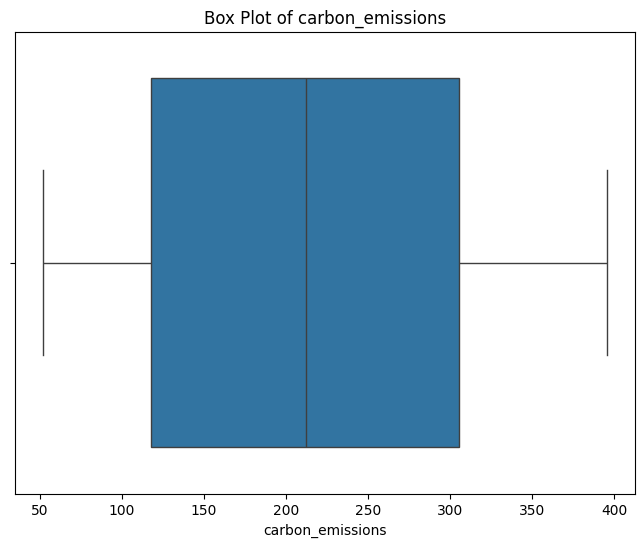

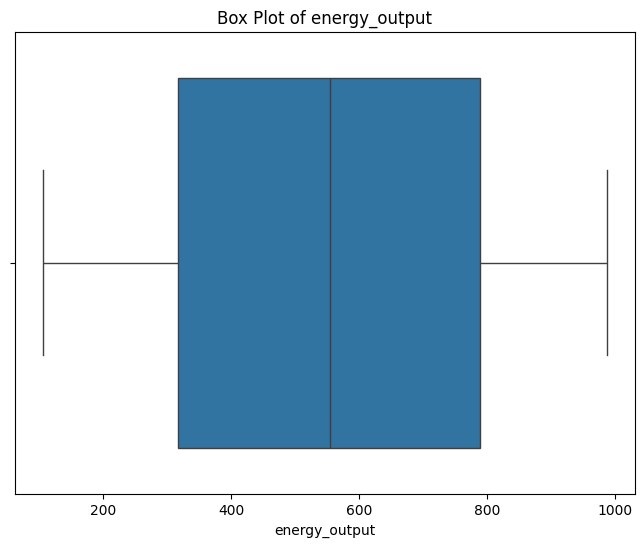

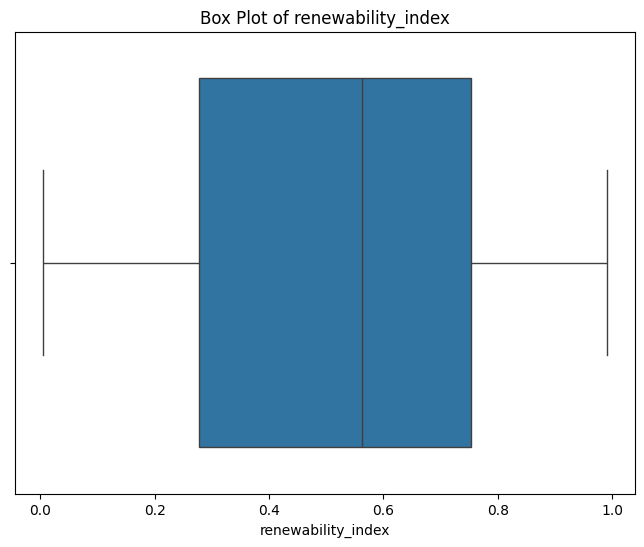

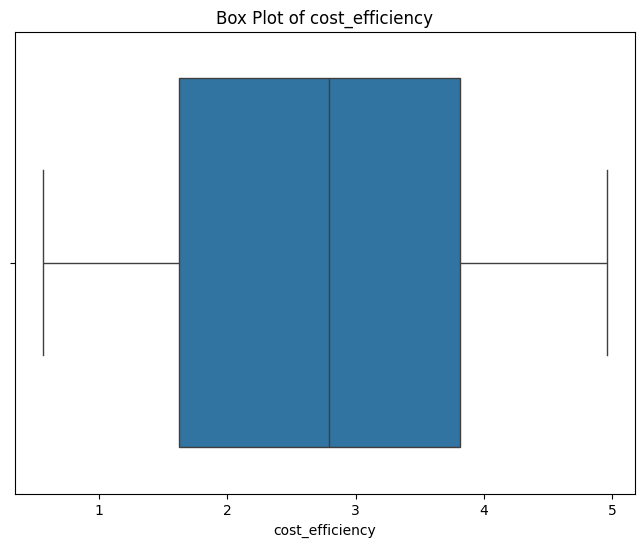

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for all features
numerical_cols = ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

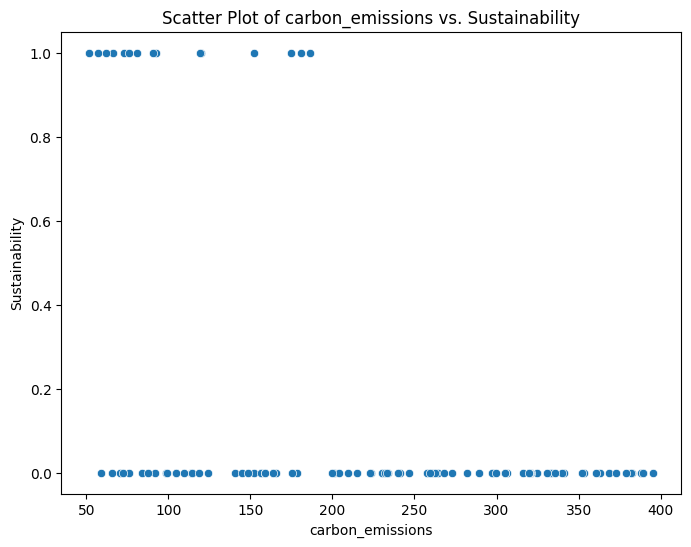

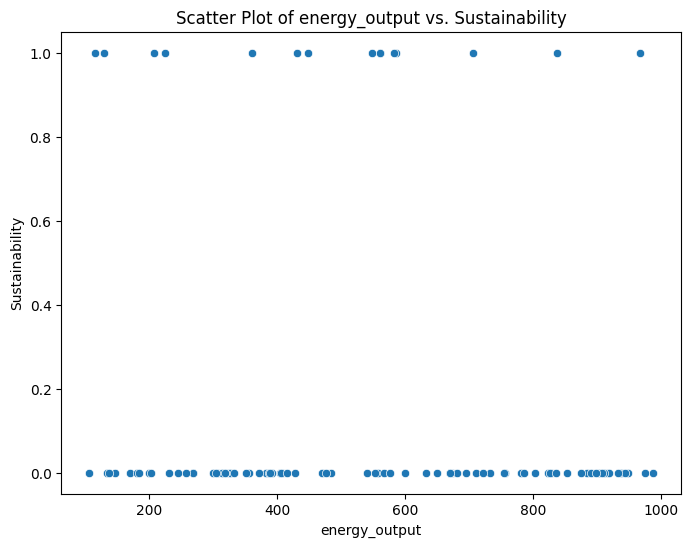

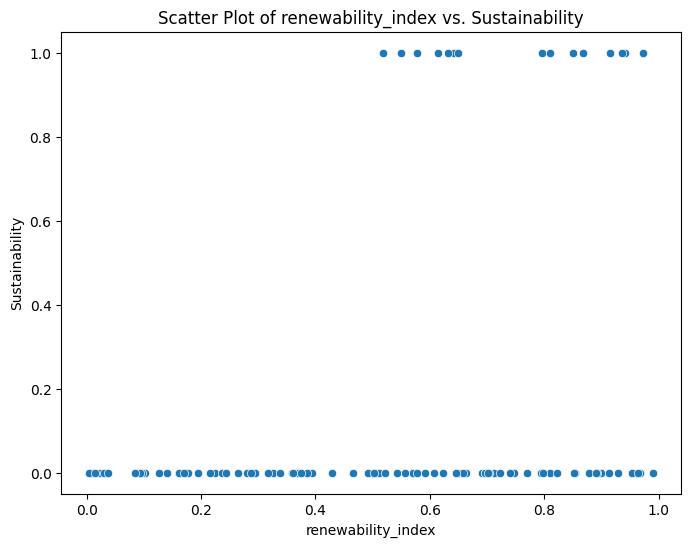

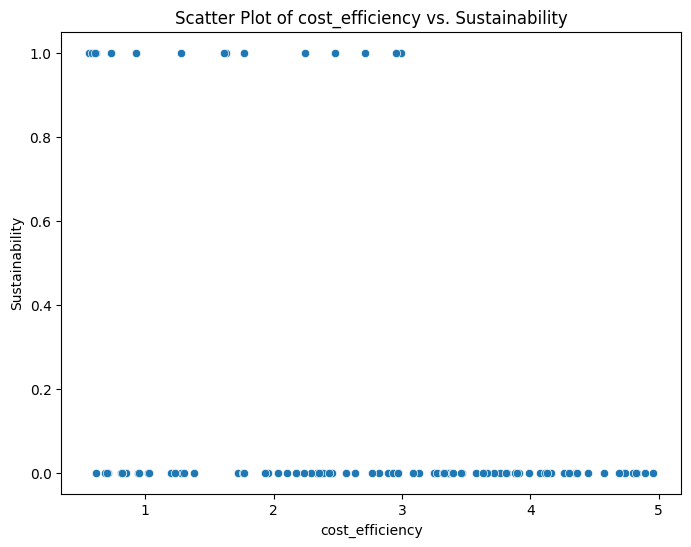

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for features versus the target variable
numerical_cols = ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='sustainability')
    plt.title(f'Scatter Plot of {col} vs. Sustainability')
    plt.xlabel(col)
    plt.ylabel('Sustainability')
    plt.show()

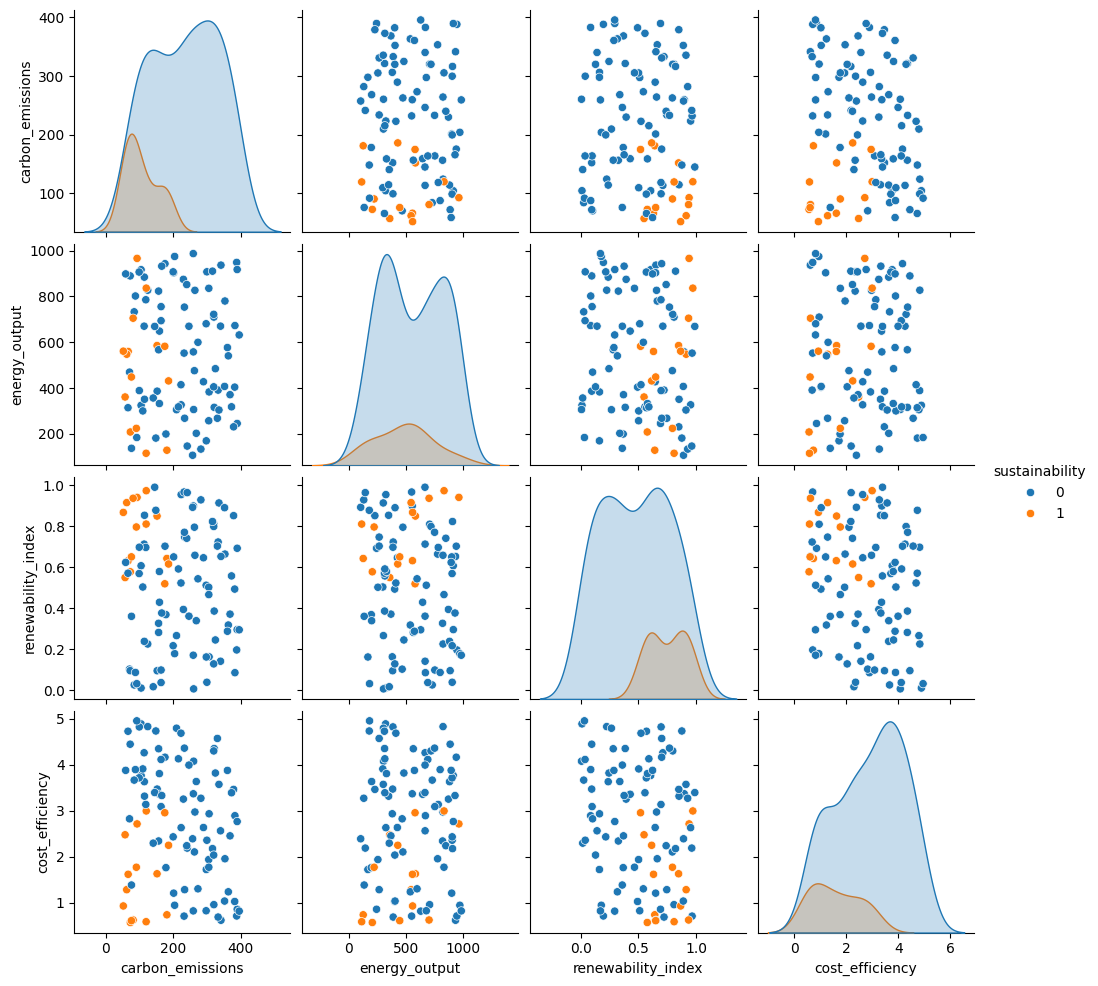

In [ ]:
import seaborn as sns

# Create pair plot for all numerical features
sns.pairplot(df[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency', 'sustainability']], hue='sustainability')
plt.show()

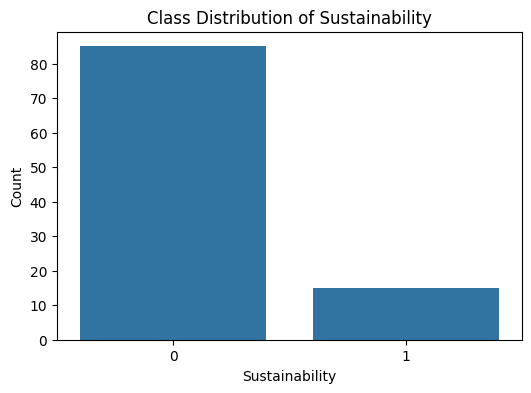

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='sustainability', data=df)
plt.title('Class Distribution of Sustainability')
plt.xlabel('Sustainability')
plt.ylabel('Count')
plt.show()

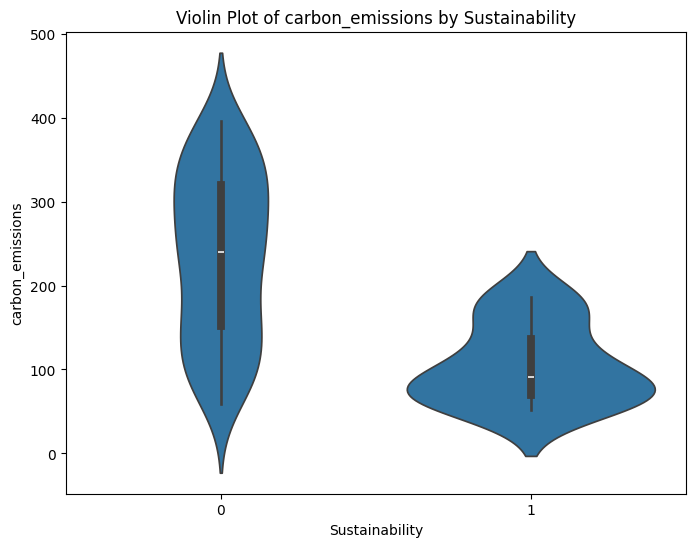

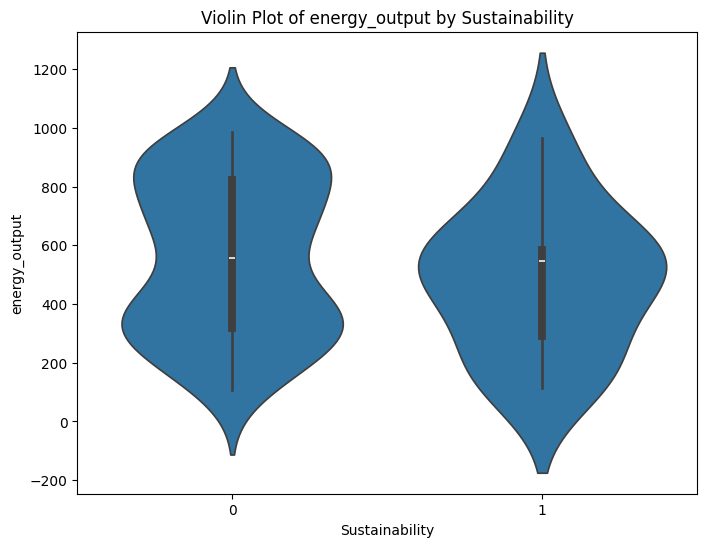

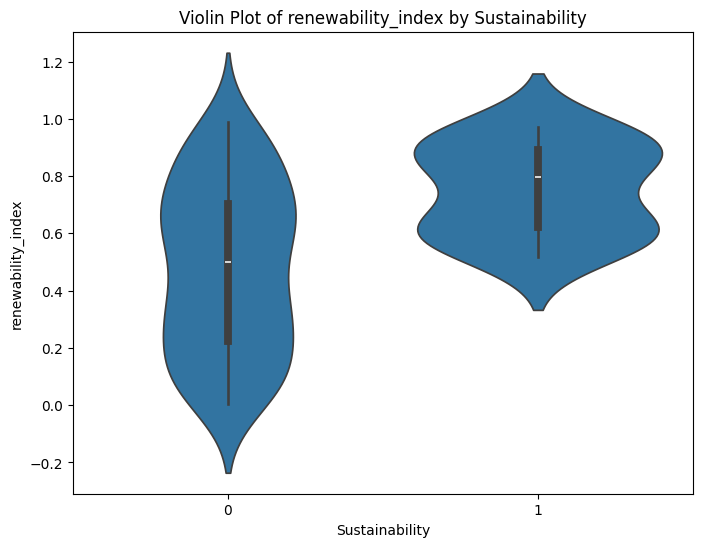

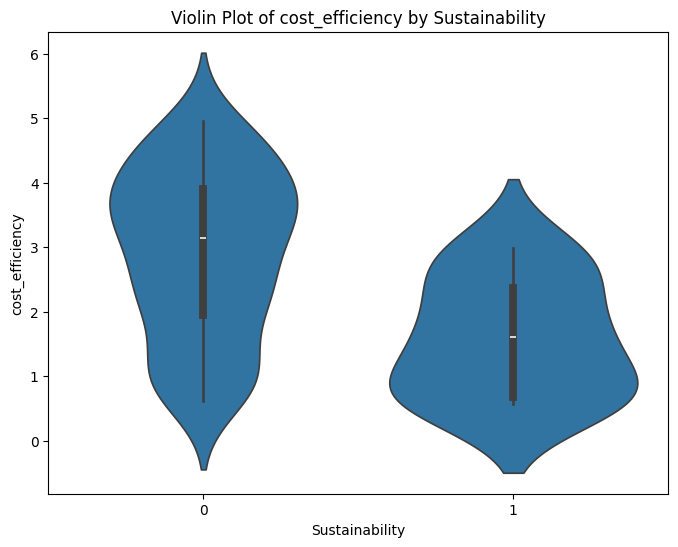

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='sustainability', y=col)
    plt.title(f'Violin Plot of {col} by Sustainability')
    plt.xlabel('Sustainability')
    plt.ylabel(col)
    plt.show()

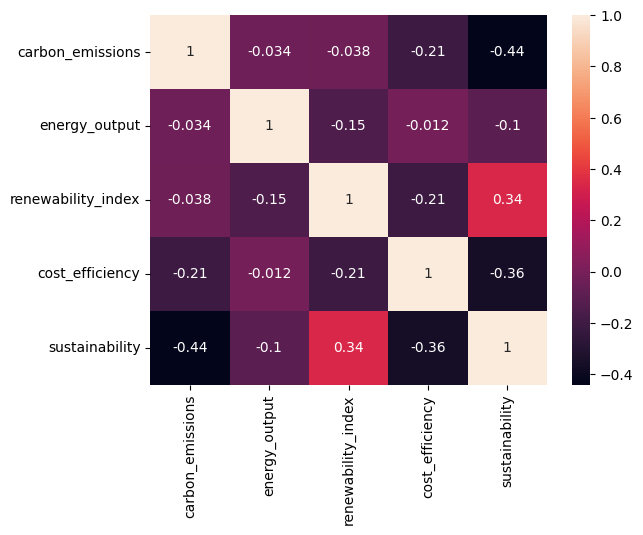

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
X=df[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y=df['sustainability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [ ]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.95


In [ ]:
conf_matrix=confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[17  0]
 [ 1  2]]


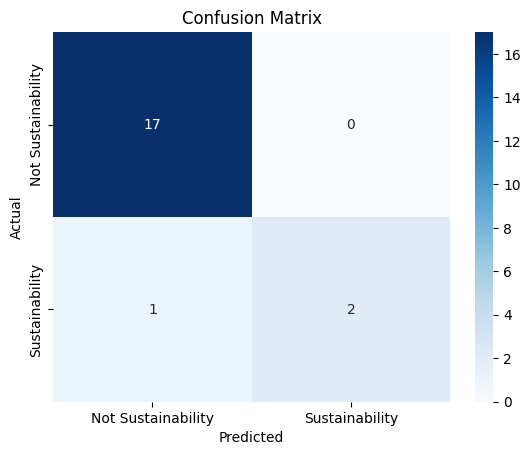

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sustainability', 'Sustainability'], yticklabels=['Not Sustainability', 'Sustainability'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [ ]:
cofficients=pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print(cofficients)

                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [ ]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:

import joblib
import pandas as pd

# Load the trained model
loaded_model = joblib.load('model.pkl')

# Sample data for prediction (replace with your actual data)
new_data = pd.DataFrame({
    'carbon_emissions': [100],  # Example value, replace with your actual value
    'renewability_index': [0.8],  # Example value, replace with your actual value
    'cost_efficiency': [0.6]  # Example value, replace with your actual value
})

# Make predictions
predictions = loaded_model.predict(new_data)
print(f"Prediction: {predictions}")


# For predicting the probability of each class
probabilities = loaded_model.predict_proba(new_data)
print(f"Probabilities: {probabilities}")

Prediction: [1]
Probabilities: [[0.10443339 0.89556661]]
